# PREPARING AND CLEANING THE DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

cardio_data = pd.read_csv('cardio_train.csv', delimiter=';')
df = cardio_data

#Remove Missing Values
print(df.shape)
print('Dropping Missing Values: ')
df = df.dropna()
print(df.shape)
df
#No misssing values in the dataset 


(70000, 13)
Dropping Missing Values: 
(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Blood Pressure Values

Summary statistics for 'ap_hi':
Mean: 128.8172857142857
Standard Deviation: 154.01141945609137
Min: -150
25th Percentile: 120.0
50th Percentile (Median): 120.0
75th Percentile: 140.0
Max: 16020
Count: 70000

Summary statistics for 'ap_lo':
Mean: 96.63041428571428
Standard Deviation: 188.47253029639026
Min: -70
25th Percentile: 80.0
50th Percentile (Median): 80.0
75th Percentile: 90.0
Max: 11000
Count: 70000


Number of negative values in 'ap_hi': 7
Number of negative values in 'ap_lo': 1


Removing negative values:
Number of negative values in 'ap_hi': 0
Number of negative values in 'ap_lo': 0


Hi:
lower: 90.0
upper: 170.0
Lo:
lower: 65.0
upper: 105.0
Number of outliers in 'ap_hi': 1427
Number of outliers in 'ap_lo': 4631
Number of outliers remaining in 'ap_hi' after cleaning: 0
Number of outliers remaining in 'ap_lo' after cleaning: 0
/tmp/ipykernel_63/351020385.py:139: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two mino

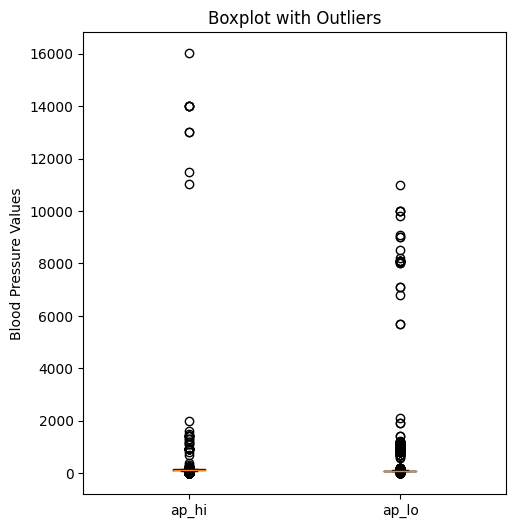

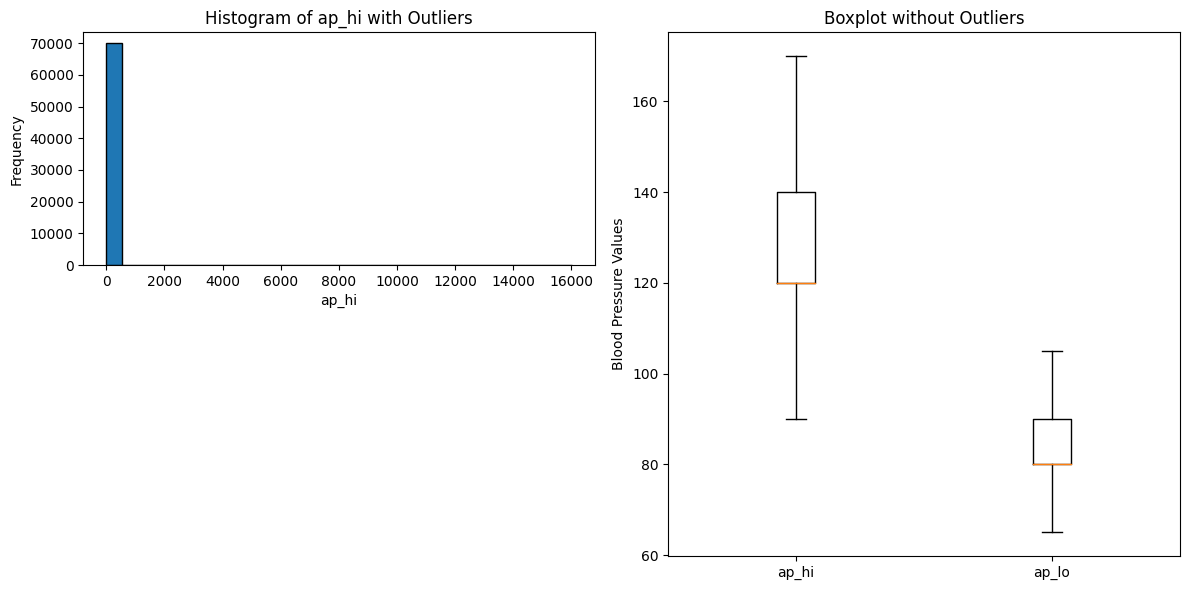

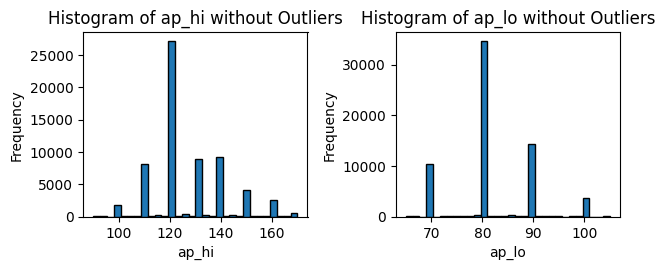

[21094, 42875]
hi = 90 and lo = 100
Summary statistics for 'ap_hi'after data cleaning:
Mean: 126.62367441860465
Standard Deviation: 14.38480753905558
Min: 90
25th Percentile: 120.0
50th Percentile (Median): 120.0
75th Percentile: 140.0
Max: 170
Count: 64500

Summary statistics for 'ap_lo' after data cleaning:
Mean: 81.78948837209302
Standard Deviation: 7.713382279647256
Min: 65
25th Percentile: 80.0
50th Percentile (Median): 80.0
75th Percentile: 90.0
Max: 105
Count: 64500


In [2]:
# Calculate summary statistics for 'ap_hi'
ap_hi_mean = df['ap_hi'].mean()
ap_hi_std = df['ap_hi'].std()
ap_hi_min = df['ap_hi'].min()
ap_hi_25 = df['ap_hi'].quantile(0.25)
ap_hi_50 = df['ap_hi'].median()
ap_hi_75 = df['ap_hi'].quantile(0.75)
ap_hi_max = df['ap_hi'].max()
ap_hi_count = df['ap_hi'].count()


# Print summary statistics for 'ap_hi'
print("Summary statistics for 'ap_hi':")
print(f"Mean: {ap_hi_mean}")
print(f"Standard Deviation: {ap_hi_std}")
print(f"Min: {ap_hi_min}")
print(f"25th Percentile: {ap_hi_25}")
print(f"50th Percentile (Median): {ap_hi_50}")
print(f"75th Percentile: {ap_hi_75}")
print(f"Max: {ap_hi_max}")
print(f"Count: {ap_hi_count}")

# Calculate summary statistics for 'ap_lo'
ap_lo_mean = df['ap_lo'].mean()
ap_lo_std = df['ap_lo'].std()
ap_lo_min = df['ap_lo'].min()
ap_lo_25 = df['ap_lo'].quantile(0.25)
ap_lo_50 = df['ap_lo'].median()
ap_lo_75 = df['ap_lo'].quantile(0.75)
ap_lo_max = df['ap_lo'].max()
ap_lo_count = df['ap_lo'].count()

# Print summary statistics for 'ap_lo'
print("\nSummary statistics for 'ap_lo':")
print(f"Mean: {ap_lo_mean}")
print(f"Standard Deviation: {ap_lo_std}")
print(f"Min: {ap_lo_min}")
print(f"25th Percentile: {ap_lo_25}")
print(f"50th Percentile (Median): {ap_lo_50}")
print(f"75th Percentile: {ap_lo_75}")
print(f"Max: {ap_lo_max}")
print(f"Count: {ap_lo_count}")

negative_ap_hi = (df['ap_hi'] < 0).sum()
negative_ap_lo = (df['ap_lo'] < 0).sum()
print("\n")
print(f"Number of negative values in 'ap_hi': {negative_ap_hi}")
print(f"Number of negative values in 'ap_lo': {negative_ap_lo}")
#ap_hi: 7 entries with negative values.
#ap_lo: 1 entry with negative value.



# Remove rows with negative values in 'ap_hi' and 'ap_lo'
df = df[(df['ap_hi'] >= 0) & (df['ap_lo'] >= 0)]
print("\n")
print("Removing negative values:")
negative_ap_hi = (df['ap_hi'] < 0).sum()
negative_ap_lo = (df['ap_lo'] < 0).sum()
print(f"Number of negative values in 'ap_hi': {negative_ap_hi}")
print(f"Number of negative values in 'ap_lo': {negative_ap_lo}")
print("\n")





# Generate initial boxplot with outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot([df['ap_hi'], df['ap_lo']], labels=['ap_hi', 'ap_lo'])
plt.title('Boxplot with Outliers')
plt.ylabel('Blood Pressure Values')

# Generate histograms with outliers
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df['ap_hi'], bins=30, edgecolor='black')
plt.title('Histogram of ap_hi with Outliers')
plt.xlabel('ap_hi')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['ap_lo'], bins=30, edgecolor='black')
plt.title('Histogram of ap_lo with Outliers')
plt.xlabel('ap_lo')
plt.ylabel('Frequency')


# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'ap_hi' and 'ap_lo'
Q1_ap_hi = df['ap_hi'].quantile(0.25)
Q3_ap_hi = df['ap_hi'].quantile(0.75)
IQR_ap_hi = Q3_ap_hi - Q1_ap_hi

Q1_ap_lo = df['ap_lo'].quantile(0.25)
Q3_ap_lo = df['ap_lo'].quantile(0.75)
IQR_ap_lo = Q3_ap_lo - Q1_ap_lo

# Define lower and upper bounds for 'ap_hi' and 'ap_lo' to identify outliers
lower_bound_ap_hi = Q1_ap_hi - 1.5 * IQR_ap_hi
upper_bound_ap_hi = Q3_ap_hi + 1.5 * IQR_ap_hi

print("Hi:")
print(f"lower: {lower_bound_ap_hi}")
print(f"upper: {upper_bound_ap_hi}")


lower_bound_ap_lo = Q1_ap_lo - 1.5 * IQR_ap_lo
upper_bound_ap_lo = Q3_ap_lo + 1.5 * IQR_ap_lo

print("Lo:")
print(f"lower: {lower_bound_ap_lo}")
print(f"upper: {upper_bound_ap_lo}")


# Identify and count outliers for 'ap_hi' and 'ap_lo'
outliers_ap_hi_count = ((df['ap_hi'] < lower_bound_ap_hi) | (df['ap_hi'] > upper_bound_ap_hi)).sum()
outliers_ap_lo_count = ((df['ap_lo'] < lower_bound_ap_lo) | (df['ap_lo'] > upper_bound_ap_lo)).sum()

print(f"Number of outliers in 'ap_hi': {outliers_ap_hi_count}")
print(f"Number of outliers in 'ap_lo': {outliers_ap_lo_count}")

# Remove outliers from the dataframe
df = df[(df['ap_hi'] >= lower_bound_ap_hi) & (df['ap_hi'] <= upper_bound_ap_hi) & 
                (df['ap_lo'] >= lower_bound_ap_lo) & (df['ap_lo'] <= upper_bound_ap_lo)]

# Verify removal of outliers
remaining_outliers_ap_hi_count = ((df['ap_hi'] < lower_bound_ap_hi) | (df['ap_hi'] > upper_bound_ap_hi)).sum()
remaining_outliers_ap_lo_count = ((df['ap_lo'] < lower_bound_ap_lo) | (df['ap_lo'] > upper_bound_ap_lo)).sum()

print(f"Number of outliers remaining in 'ap_hi' after cleaning: {remaining_outliers_ap_hi_count}")
print(f"Number of outliers remaining in 'ap_lo' after cleaning: {remaining_outliers_ap_lo_count}")



# Generate boxplot without outliers
plt.subplot(1, 2, 2)
plt.boxplot([df['ap_hi'], df['ap_lo']], labels=['ap_hi', 'ap_lo'])
plt.title('Boxplot without Outliers')
plt.ylabel('Blood Pressure Values')

plt.tight_layout()
plt.show()

#  Generate histograms without outliers
plt.subplot(2, 2, 3)
plt.hist(df['ap_hi'], bins=30, edgecolor='black')
plt.title('Histogram of ap_hi without Outliers')
plt.xlabel('ap_hi')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['ap_lo'], bins=30, edgecolor='black')
plt.title('Histogram of ap_lo without Outliers')
plt.xlabel('ap_lo')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Check if all the Systolic blood pressure values are higher than the Diastolic blood pressure values
ap_hi = df['ap_hi'].values.tolist()
ap_lo = df['ap_lo'].values.tolist()

incorrect_bp = []
for i in range(len(ap_hi)):
    if ap_hi[i] < ap_lo[i]:
        incorrect_bp.append(i)
print(incorrect_bp)
print(f"hi = {ap_hi[42875]} and lo = {ap_lo[42875]}")

for x in incorrect_bp:
    df = df.drop([x])

# Calculate summary statistics for 'ap_hi' after data cleaning
ap_hi_mean = df['ap_hi'].mean()
ap_hi_std = df['ap_hi'].std()
ap_hi_min = df['ap_hi'].min()
ap_hi_25 = df['ap_hi'].quantile(0.25)
ap_hi_50 = df['ap_hi'].median()
ap_hi_75 = df['ap_hi'].quantile(0.75)
ap_hi_max = df['ap_hi'].max()
ap_hi_count = df['ap_hi'].count()

# Print summary statistics for 'ap_hi' after data cleaning
print("Summary statistics for 'ap_hi'after data cleaning:")
print(f"Mean: {ap_hi_mean}")
print(f"Standard Deviation: {ap_hi_std}")
print(f"Min: {ap_hi_min}")
print(f"25th Percentile: {ap_hi_25}")
print(f"50th Percentile (Median): {ap_hi_50}")
print(f"75th Percentile: {ap_hi_75}")
print(f"Max: {ap_hi_max}")
print(f"Count: {ap_hi_count}")

# Calculate summary statistics for 'ap_lo' after data cleaning 
ap_lo_mean = df['ap_lo'].mean()
ap_lo_std = df['ap_lo'].std()
ap_lo_min = df['ap_lo'].min()
ap_lo_25 = df['ap_lo'].quantile(0.25)
ap_lo_50 = df['ap_lo'].median()
ap_lo_75 = df['ap_lo'].quantile(0.75)
ap_lo_max = df['ap_lo'].max()
ap_lo_count = df['ap_lo'].count()

# Print summary statistics for 'ap_lo' after data cleaning 
print("\nSummary statistics for 'ap_lo' after data cleaning:")
print(f"Mean: {ap_lo_mean}")
print(f"Standard Deviation: {ap_lo_std}")
print(f"Min: {ap_lo_min}")
print(f"25th Percentile: {ap_lo_25}")
print(f"50th Percentile (Median): {ap_lo_50}")
print(f"75th Percentile: {ap_lo_75}")
print(f"Max: {ap_lo_max}")
print(f"Count: {ap_lo_count}")



    

## Age 

In [3]:
df['age'] = df['age'] // 365.25

#df['age_years'] = df['age'] // 365
#df['age_days_remaining'] = df['age'] % 365
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
5,8,59.0,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57.0,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,52.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61.0,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


## Height

In [4]:
#Change height from cm to m
df['height'] = df['height'] / 100
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,51.0,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1
5,8,59.0,1,1.51,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,57.0,1,1.65,80.0,150,80,1,1,0,0,1,1
69995,99993,52.0,2,1.68,76.0,120,80,1,1,1,0,1,0
69996,99995,61.0,1,1.58,126.0,140,90,2,2,0,0,1,1
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1


# DESCRIPTIVE STATISTICS

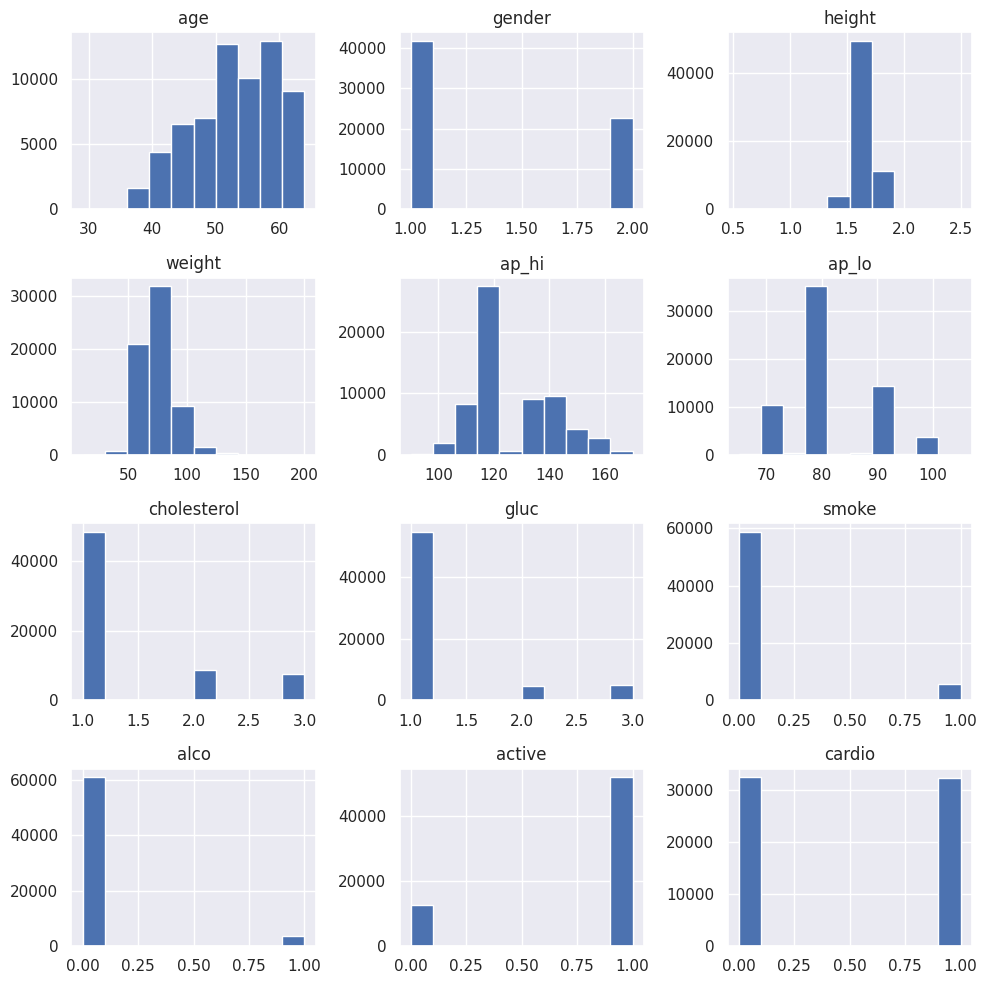

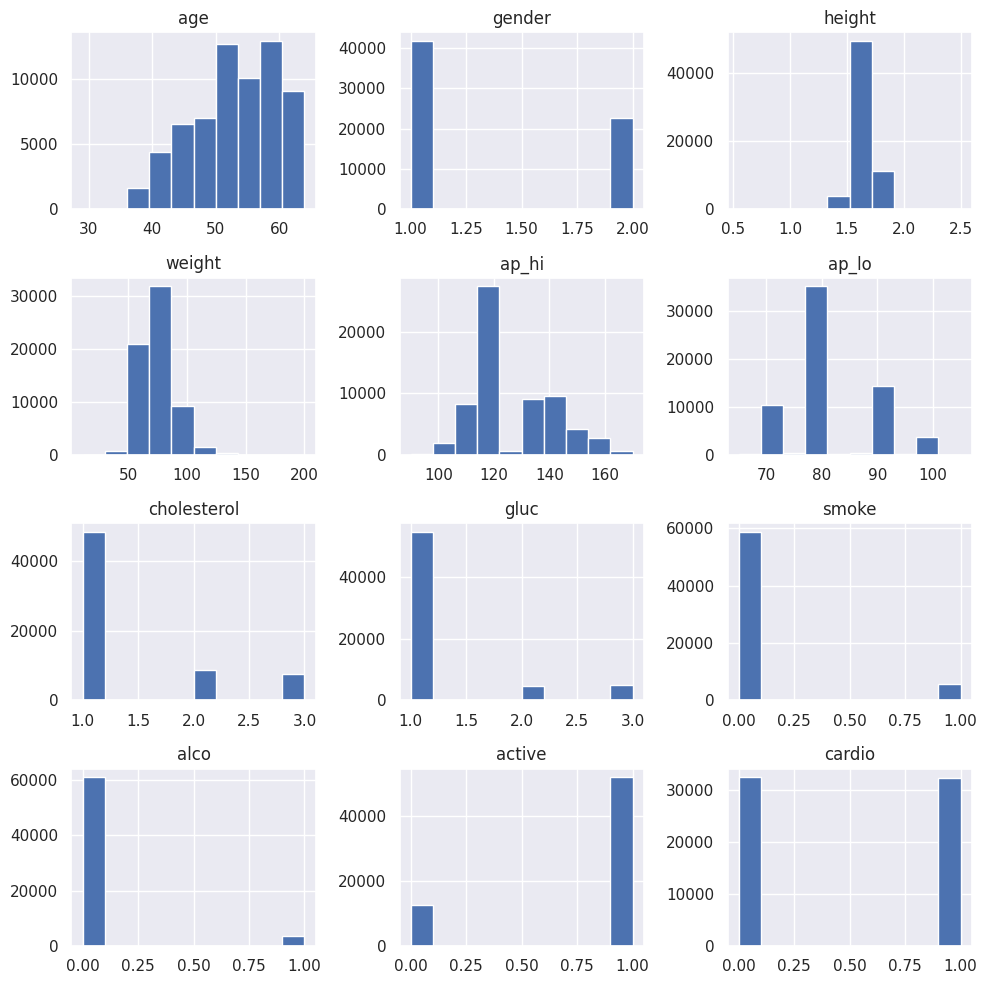

Average values of numerical columns:
age             52.866326
gender           1.351891
height           1.644574
weight          74.261954
ap_hi          126.623674
ap_lo           81.789488
cholesterol      1.364264
gluc             1.225659
smoke            0.087628
alco             0.053070
active           0.803473
cardio           0.498388
dtype: float64


In [5]:
sns.set()
df.select_dtypes(include=np.number).drop(columns=['id']).hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

sns.set()

# Plot histograms of columns except 'id'
df.select_dtypes(include=np.number).drop(columns=['id']).hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Calculate and print the average values of the numerical columns except 'id'
mean_values = df.select_dtypes(include=np.number).drop(columns=['id']).mean()
print("Average values of numerical columns:")
print(mean_values)

## What is the average age of the people that have been examined?

In [6]:
avg_age = round(df['age'].mean(), 0)
print(f"The average age of people that have been examined is: {avg_age}")


#avg_age_years = avg_age // 365
#avg_age_days_remaining = round(avg_age % 365, 0)

#print(f"The average age of people that have been examined is: {avg_age_years} and {avg_age_days_remaining} days")

The average age of people that have been examined is: 53.0


## What is the average BMI of men

In [7]:
men_df = df[df['gender'] == 2] 
men_df['BMI'] = round(men_df['weight'] / (men_df['height'] ** 2), 2)
avg_men_BMI = men_df['BMI'].mean()

print(men_df[['id', 'height', 'weight', 'BMI']])
print(f"The average BMI of men is: {avg_men_BMI}")



          id  height  weight    BMI
0          0    1.68    62.0  21.97
3          3    1.69    82.0  28.71
7         12    1.78    95.0  29.98
11        16    1.73    60.0  20.05
12        18    1.65    60.0  22.04
...      ...     ...     ...    ...
69980  99971    1.67    69.0  24.74
69981  99972    1.82   110.0  33.21
69984  99975    1.68    80.0  28.34
69986  99978    1.80    78.0  24.07
69995  99993    1.68    76.0  26.93

[22697 rows x 4 columns]
The average BMI of men is: 26.726874917389964
/tmp/ipykernel_63/3260985157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_df['BMI'] = round(men_df['weight'] / (men_df['height'] ** 2), 2)


## Is this different when you separate per age group?

In [8]:
def calculate_bmi(height, weight):
    return round(weight / (height ** 2), 2)

young_men = men_df[(men_df['age'] >= 25) & (men_df['age'] < 35)]
middle_aged_men = men_df[(men_df['age'] >= 35) & (men_df['age'] < 55)]
elderly_men = men_df[(men_df['age'] >= 55) & (men_df['age'] < 65)]

# Calculate BMI for each age group
young_men['BMI'] = calculate_bmi(young_men['height'], young_men['weight'])
middle_aged_men['BMI'] = calculate_bmi(middle_aged_men['height'], middle_aged_men['weight'])
elderly_men['BMI'] = calculate_bmi(elderly_men['height'], elderly_men['weight'])


print("Young Men:")
print(young_men[['id', 'age', 'height', 'weight', 'BMI']])
print(f"\nThe average BMI of young men: {young_men['BMI'].mean()}")
print("\nMiddle-Aged Men:")
print(middle_aged_men[['id', 'age', 'height', 'weight', 'BMI']])
print(f"\nThe average BMI of middle-aged men: {middle_aged_men['BMI'].mean()}")
print("\nElderly Men:")
print(elderly_men[['id', 'age', 'height', 'weight', 'BMI']])
print(f"\nThe average BMI of elderly men: {elderly_men['BMI'].mean()}")

Young Men:
Empty DataFrame
Columns: [id, age, height, weight, BMI]
Index: []

The average BMI of young men: nan

Middle-Aged Men:
          id   age  height  weight    BMI
0          0  50.0    1.68    62.0  21.97
3          3  48.0    1.69    82.0  28.71
11        16  51.0    1.73    60.0  20.05
12        18  40.0    1.65    60.0  22.04
14        23  39.0    1.81    95.0  29.00
...      ...   ...     ...     ...    ...
69980  99971  48.0    1.67    69.0  24.74
69981  99972  47.0    1.82   110.0  33.21
69984  99975  49.0    1.68    80.0  28.34
69986  99978  49.0    1.80    78.0  24.07
69995  99993  52.0    1.68    76.0  26.93

[12820 rows x 5 columns]

The average BMI of middle-aged men: 26.52953042121685

Elderly Men:
          id   age  height  weight    BMI
7         12  61.0    1.78    95.0  29.98
19        29  59.0    1.62    56.0  21.34
29        40  57.0    1.69    74.0  25.91
34        46  60.0    1.73    82.0  27.40
38        52  64.0    1.62    72.0  27.43
...      ...   ... 

## What is the average BMI of women

In [9]:
women_df = df[df['gender'] == 1] 
women_df['BMI'] = round(women_df['weight'] / (women_df['height'] ** 2), 2)
avg_women_BMI = women_df['BMI'].mean()

print(women_df[['id', 'height', 'weight', 'BMI']])
print(f"The average BMI of women is: {avg_women_BMI}")

          id  height  weight    BMI
1          1    1.56    85.0  34.93
2          2    1.65    64.0  23.51
5          8    1.51    67.0  29.38
6          9    1.57    93.0  37.73
8         13    1.58    71.0  28.44
...      ...     ...     ...    ...
69993  99991    1.72    70.0  23.66
69994  99992    1.65    80.0  29.38
69996  99995    1.58   126.0  50.47
69998  99998    1.63    72.0  27.10
69999  99999    1.70    72.0  24.91

[41803 rows x 4 columns]
The average BMI of women is: 27.988864435566825
/tmp/ipykernel_63/3010891529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_df['BMI'] = round(women_df['weight'] / (women_df['height'] ** 2), 2)


## Is this different when you separate per age group?

In [10]:
young_women = women_df[(women_df['age'] >= 25) & (women_df['age'] < 35)]
middle_aged_women = women_df[(women_df['age'] >= 35) & (women_df['age'] < 55)]
elderly_women = women_df[(women_df['age'] >= 55) & (women_df['age'] < 65)]

# Calculate BMI for each age group
young_women['BMI'] = calculate_bmi(young_women['height'], young_women['weight'])
middle_aged_women['BMI'] = calculate_bmi(middle_aged_women['height'], middle_aged_women['weight'])
elderly_women['BMI'] = calculate_bmi(elderly_women['height'], elderly_women['weight'])

# Display the dataframes to verify
print("Young Women:")
print(young_women[['id', 'age', 'height', 'weight', 'BMI']])
print(f"\nThe average BMI of young women: {young_women['BMI'].mean()}")
print("\nMiddle-Aged Women:")
print(middle_aged_women[['id', 'age', 'height', 'weight', 'BMI']])
print(f"\nThe average BMI of middle-aged women: {middle_aged_women['BMI'].mean()}")
print("\nElderly Women:")
print(elderly_women[['id', 'age', 'height', 'weight', 'BMI']])
print(f"\nThe average BMI of elderly women: {elderly_women['BMI'].mean()}")

Young Women:
          id   age  height  weight    BMI
6219    8850  29.0    1.75    59.0  19.27
30666  43842  29.0    1.59    59.0  23.34
55905  79749  30.0    1.60    59.0  23.05

The average BMI of young women: 21.886666666666667

Middle-Aged Women:
          id   age  height  weight    BMI
2          2  51.0    1.65    64.0  23.51
8         13  48.0    1.58    71.0  28.44
13        21  54.0    1.58    78.0  31.24
17        27  45.0    1.58    52.0  20.83
18        28  47.0    1.54    68.0  28.67
...      ...   ...     ...     ...    ...
69985  99977  49.0    1.56   102.0  41.91
69987  99979  51.0    1.51    49.0  21.49
69990  99986  41.0    1.68    72.0  25.51
69992  99990  51.0    1.61    56.0  21.60
69993  99991  53.0    1.72    70.0  23.66

[22657 rows x 5 columns]

The average BMI of middle-aged women: 27.55039546277089

Elderly Women:
          id   age  height  weight    BMI
1          1  55.0    1.56    85.0  34.93
5          8  59.0    1.51    67.0  29.38
6          9  60.0

## the average gap between Systolic blood pressure and Diastolic blood pressure

### Difference between Gender

In [11]:
# gap between systolic and diastolic blood pressure
bloodgap_df = df.copy()
bloodgap_df['bp_gap'] = bloodgap_df['ap_hi'] - bloodgap_df['ap_lo']

# average blod gap
bloodgap_avg = bloodgap_df['bp_gap'].mean()
print(f"Average gap between systolic and diastolic blood pressure: {bloodgap_avg:.2f}", '\n')

# average blood gap by gender
bloodgap_female = bloodgap_df[bloodgap_df['gender'] == 1]['bp_gap'].mean()
bloodgap_male = bloodgap_df[bloodgap_df['gender'] == 2]['bp_gap'].mean()

print(f"Blood Gap by female: {bloodgap_female:.2f}")
print(f"Blood Gap by male: {bloodgap_male:.2f}")

Average gap between systolic and diastolic blood pressure: 44.83 

Blood Gap by female: 44.65
Blood Gap by male: 45.18


### Difference among Age Groups

In [12]:
# youngest and eldest
print(f'Youngest:', bloodgap_df['age'].min())
print(f'Eldest:', bloodgap_df['age'].max(), '\n')

# average blood gap by age group
age_bins = [20, 30, 40, 50, 60, float('inf')]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
bloodgap_df['age_group'] = pd.cut(bloodgap_df['age'], bins=age_bins, labels=age_labels, right=False)
bloodgap_by_age = bloodgap_df.groupby('age_group')['bp_gap'].mean()
print("Average blood pressure gap by age group:")
print(bloodgap_by_age.round(2))

Youngest: 29.0
Eldest: 64.0 

Average blood pressure gap by age group:
age_group
20-29    40.00
30-39    41.25
40-49    42.93
50-59    45.16
60-69    47.33
Name: bp_gap, dtype: float64
/tmp/ipykernel_63/976729495.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bloodgap_by_age = bloodgap_df.groupby('age_group')['bp_gap'].mean()


## Correlation

/tmp/ipykernel_63/1561166399.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot: >

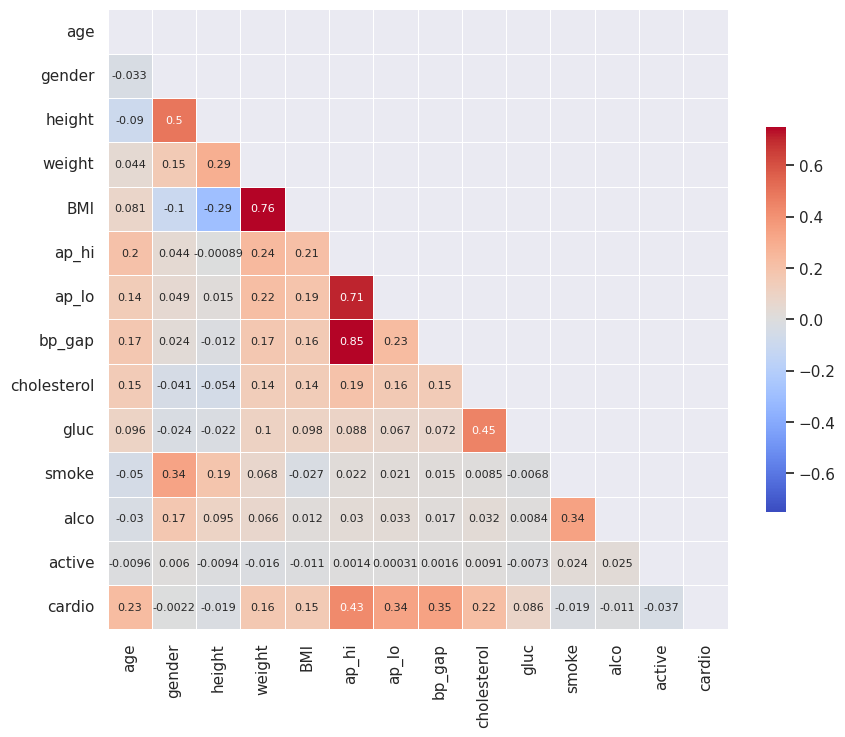

In [13]:
import seaborn as sns

df2 = df.copy()
# Add BMI, blood pressure gap to the dataframe
df2['BMI']=df2["weight"] / (df2["height"]**2)
df2['bp_gap'] = df2['ap_hi'] - df2['ap_lo']
# select columns to calculate correlation
cols = ['age', 'gender', 'height', 'weight', 'BMI', 'ap_hi', 'ap_lo', 'bp_gap', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# correlation matrix
corr = df2[cols].corr()

plt.figure(figsize=(10, 10))

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-0.75, vmax=0.75, center=0,
            annot=True, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5},annot_kws={"fontsize":8})


In [14]:
df2['BMI'].mean()

27.544744796815518

# EXPLORATORY ANALYSIS

## Are men / women more likely to have cardiovascular disease?

In [15]:
# Female: 'gender'==1, Male: 'gender'==2
df2.groupby('gender').agg({'cardio': ['mean','sum', 'count'], 'age':'mean', 'BMI': 'mean', 'bp_gap': 'mean', 'cholesterol': 'mean', 'gluc': 'mean','smoke': 'mean', 'alco': 'mean', 'active': 'mean'})

cardio                      age        BMI     bp_gap cholesterol  \
            mean    sum  count       mean       mean       mean        mean   
gender                                                                        
1       0.499199  20868  41803  53.028347  27.988817  44.647346    1.384877   
2       0.496894  11278  22697  52.567916  26.726860  45.178306    1.326299   

            gluc     smoke      alco    active  
            mean      mean      mean      mean  
gender                                          
1       1.235892  0.017487  0.024998  0.801713  
2       1.206811  0.216813  0.104772  0.806715

In [16]:
male_df = df[df['gender'] == 2]
female_df = df[df['gender'] == 1]

# Calculate proportion of individuals with cardiovascular disease
male_cvd_proportion = male_df['cardio'].mean()
female_cvd_proportion = female_df['cardio'].mean()

print(f"Proportion of males with cardiovascular disease: {male_cvd_proportion:.2f}")
print(f"Proportion of females with cardiovascular disease: {female_cvd_proportion:.2f}")

gender_counts = df['gender'].value_counts()

# Print the counts
num_men = male_df.count()  
num_women = female_df.count()  
print("\n")
print(f"Number of men in the dataset: {num_men.iloc[0]}")
print(f"Number of women in the dataset: {num_women.iloc[0]}")

#They are both 50/50 but since there are more women in this dataset we could 
#say that maybe women are less likely since less men has an equal proportion?

Proportion of males with cardiovascular disease: 0.50
Proportion of females with cardiovascular disease: 0.50


Number of men in the dataset: 22697
Number of women in the dataset: 41803


## Unhealthy people Vs. Cardiovascular Disease

### Cholesterol

In [17]:
# 1: normal, 2: above normal, 3: well above normal 
df2.groupby('cholesterol').agg({'cardio': ['mean','sum', 'count'], 'gender': 'mean', 'age':'mean', 'BMI': 'mean', 'bp_gap': 'mean', 'gluc': 'mean','smoke': 'mean', 'alco': 'mean', 'active': 'mean'})

cardio                  gender        age        BMI  \
                 mean    sum  count      mean       mean       mean   
cholesterol                                                           
1            0.439859  21316  48461  1.362683  52.371288  27.065336   
2            0.599091   5142   8583  1.330421  53.212513  28.574252   
3            0.762876   5688   7456  1.306465  55.685354  29.475589   

                bp_gap      gluc     smoke      alco    active  
                  mean      mean      mean      mean      mean  
cholesterol                                                     
1            43.922350  1.098925  0.084893  0.047770  0.802357  
2            47.068508  1.335197  0.106257  0.076081  0.797507  
3            48.188707  1.923283  0.083959  0.061025  0.817597

People with normal cholesterol levels that suffer from cvd: 21316
People with normal cholesterol levels that do not suffer from cvd: 27145

People with above normal cholesterol levels that suffer from cvd: 5142
People with above normal cholesterol levels that do not suffer from cvd: 3441

People with well above normal cholesterol levels that suffer from cvd: 5688
People with well above normal cholesterol levels that do not suffer from cvd: 1768



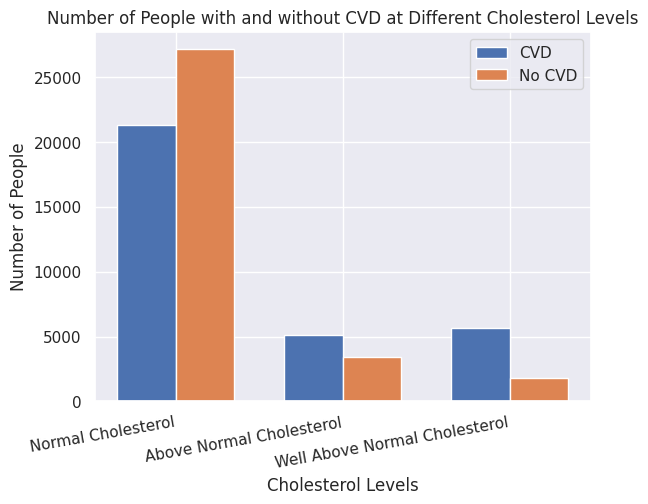

In [18]:
#seperate cholesterol levels 
normal_chol = df[df['cholesterol'] == 1]
above_chol = df[df['cholesterol'] == 2]
w_above_chol = df[df['cholesterol'] == 3]

#proportion of cardio disease sufferers for each level
normal_disease = normal_chol[normal_chol['cardio'] == 1].count()
normal_not_disease = normal_chol[normal_chol['cardio'] == 0].count()
print(f"People with normal cholesterol levels that suffer from cvd: {normal_disease.iloc[0]}")
print(f"People with normal cholesterol levels that do not suffer from cvd: {normal_not_disease.iloc[0]}\n")

above_disease = above_chol[above_chol['cardio'] == 1].count()
above_not_disease = above_chol[above_chol['cardio'] == 0].count()
print(f"People with above normal cholesterol levels that suffer from cvd: {above_disease.iloc[0]}")
print(f"People with above normal cholesterol levels that do not suffer from cvd: {above_not_disease.iloc[0]}\n")

w_above_disease = w_above_chol[w_above_chol['cardio'] == 1].count()
w_above_not_disease = w_above_chol[w_above_chol['cardio'] == 0].count()
print(f"People with well above normal cholesterol levels that suffer from cvd: {w_above_disease.iloc[0]}")
print(f"People with well above normal cholesterol levels that do not suffer from cvd: {w_above_not_disease.iloc[0]}\n")


labels = ['Normal Cholesterol', 'Above Normal Cholesterol', 'Well Above Normal Cholesterol']
cvd = [normal_disease.iloc[0], above_disease.iloc[0], w_above_disease.iloc[0]]
no_cvd = [normal_not_disease.iloc[0], above_not_disease.iloc[0], w_above_not_disease.iloc[0]]

x = range(len(labels))

fig, ax = plt.subplots()

bar_width = 0.35
bar1 = ax.bar(x, cvd, bar_width, label='CVD')
bar2 = ax.bar([p + bar_width for p in x], no_cvd, bar_width, label='No CVD')

ax.set_xlabel('Cholesterol Levels')
ax.set_ylabel('Number of People')
ax.set_title('Number of People with and without CVD at Different Cholesterol Levels')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels, rotation=10, ha="right")  # Rotate labels for better readability
ax.legend()

plt.show()


### Glucose 

People with normal glucose levels that suffer from cvd: 26355
People with normal glucose levels that do not suffer from cvd: 28531

People with above normal glucose levels that suffer from cvd: 2739
People with above normal glucose levels that do not suffer from cvd: 1934

People with well above normal glucose levels that suffer from cvd: 3052
People with well above normal glucose levels that do not suffer from cvd: 1889



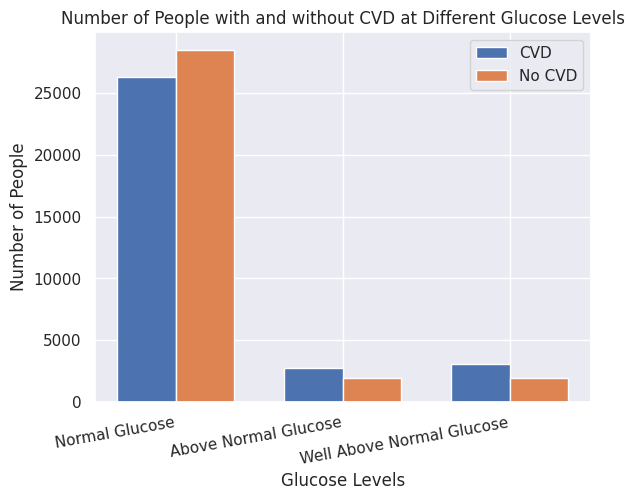

In [19]:
import matplotlib.pyplot as plt

# Separate glucose levels
normal_gluc = df[df['gluc'] == 1]
above_gluc = df[df['gluc'] == 2]
w_above_gluc = df[df['gluc'] == 3]

# Proportion of cardio disease sufferers for each level
normal_disease_gluc = normal_gluc[normal_gluc['cardio'] == 1].count()
normal_not_disease_gluc = normal_gluc[normal_gluc['cardio'] == 0].count()
print(f"People with normal glucose levels that suffer from cvd: {normal_disease_gluc.iloc[0]}")
print(f"People with normal glucose levels that do not suffer from cvd: {normal_not_disease_gluc.iloc[0]}\n")

above_disease_gluc = above_gluc[above_gluc['cardio'] == 1].count()
above_not_disease_gluc = above_gluc[above_gluc['cardio'] == 0].count()
print(f"People with above normal glucose levels that suffer from cvd: {above_disease_gluc.iloc[0]}")
print(f"People with above normal glucose levels that do not suffer from cvd: {above_not_disease_gluc.iloc[0]}\n")

w_above_disease_gluc = w_above_gluc[w_above_gluc['cardio'] == 1].count()
w_above_not_disease_gluc = w_above_gluc[w_above_gluc['cardio'] == 0].count()
print(f"People with well above normal glucose levels that suffer from cvd: {w_above_disease_gluc.iloc[0]}")
print(f"People with well above normal glucose levels that do not suffer from cvd: {w_above_not_disease_gluc.iloc[0]}\n")

# plot data
labels_gluc = ['Normal Glucose', 'Above Normal Glucose', 'Well Above Normal Glucose']
cvd_gluc = [normal_disease_gluc.iloc[0], above_disease_gluc.iloc[0], w_above_disease_gluc.iloc[0]]
no_cvd_gluc = [normal_not_disease_gluc.iloc[0], above_not_disease_gluc.iloc[0], w_above_not_disease_gluc.iloc[0]]

x_gluc = range(len(labels_gluc))

fig, ax = plt.subplots()

bar_width_gluc = 0.35  # Increased bar width
bar1_gluc = ax.bar(x_gluc, cvd_gluc, bar_width_gluc, label='CVD')
bar2_gluc = ax.bar([p + bar_width_gluc for p in x_gluc], no_cvd_gluc, bar_width_gluc, label='No CVD')

ax.set_xlabel('Glucose Levels')
ax.set_ylabel('Number of People')
ax.set_title('Number of People with and without CVD at Different Glucose Levels')
ax.set_xticks([p + bar_width_gluc / 2 for p in x_gluc])
ax.set_xticklabels(labels_gluc, rotation=10, ha="right")  # Rotate labels for better readability
ax.legend()

plt.show()


## Does being active help to reduce chances of Cardiovascular Disease in unhealthy people?

In [20]:
# 0: not active, 1: active
df2.groupby('active').agg({'cardio': ['mean','sum', 'count'], 'gender': 'mean', 'age':'mean', 'BMI': 'mean', 'bp_gap': 'mean', 'gluc': 'mean','smoke': 'mean', 'alco': 'mean', 'cholesterol': 'mean'})

cardio                  gender        age        BMI     bp_gap  \
            mean    sum  count      mean       mean       mean       mean   
active                                                                      
0       0.536131   6796  12676  1.346087  52.997791  27.677955  44.799385   
1       0.489156  25350  51824  1.353311  52.834169  27.512162  44.842698   

            gluc     smoke      alco cholesterol  
            mean      mean      mean        mean  
active                                            
0       1.234143  0.073683  0.041890    1.351688  
1       1.223584  0.091039  0.055804    1.367339

### Cholesterol

In [21]:
#Calculate the proportion of cvd suffers to whether they are active or not
def calculate_proportion(suffers, total):
    return round((suffers/total), 2)

#df for normal cholesterol levels and active or not active 
normal_active = normal_chol[normal_chol['active'] == 1]
normal_not_active = normal_chol[normal_chol['active'] == 0]
print(f"Statistics for normal cholesterol cvd sufferers:")
print(f"Number of active normal cholesterol people: {normal_active.count().iloc[0]}")
print(f"Number of inactive normal cholesterol people: {normal_not_active.count().iloc[0]}")

##df for normal cholesterol levels and active or not active that suffer or do not suffer from cvd
norm_active_suffers = normal_active[normal_active['cardio'] == 1].count()
norm_active_not_suffers = normal_not_active[normal_not_active['cardio'] == 1].count()
print(f"Number of active normal cholesterol people that suffer from cvd: {norm_active_suffers.iloc[0]}")
print(f"Number of inactive normal cholesterol people that suffer from cvd: {norm_active_not_suffers.iloc[0]}") 

#Calculate the proportion of normal cholesterol cvd suffers to whether they are active or not
normal_active_proportion = calculate_proportion(norm_active_suffers.iloc[0], normal_active.count().iloc[0]) 
normal_inactive_proportion = calculate_proportion(norm_active_not_suffers.iloc[0], normal_not_active.count().iloc[0])
print(f"Proportion of active normal cholesterol people who suffer from cvd: {normal_active_proportion}")
print(f"Proportion of inactive normal cholesterol people who suffer from cvd: {normal_inactive_proportion}\n")

#df for above normal cholesterol levels and active or not active
above_active = above_chol[above_chol['active'] == 1]
above_not_active = above_chol[above_chol['active'] == 0]
print(f"Statistics for above normal cholesterol cvd sufferers:")
print(f"Number of active above normal cholesterol people: {above_active.count().iloc[0]}")
print(f"Number of inactive above normal cholesterol people: {above_not_active.count().iloc[0]}")

##df for above normal cholesterol levels and active or not active that suffer or do not suffer from cvd
above_active_suffers = above_active[above_active['cardio'] == 1].count()
above_active_not_suffers = above_not_active[above_not_active['cardio'] == 1].count()
print(f"Number of active above normal cholesterol people that suffer from cvd: {above_active_suffers.iloc[0]}")
print(f"Number of inactive above normal cholesterol people that suffer from cvd: {above_active_not_suffers.iloc[0]}")

#Calculate the proportion of above normal cholesterol cvd suffers to whether they are active or not
above_active_proportion = calculate_proportion(above_active_suffers.iloc[0], above_active.count().iloc[0]) 
above_inactive_proportion = calculate_proportion(above_active_not_suffers.iloc[0], above_not_active.count().iloc[0])
print(f"Proportion of active above normal cholesterol people who suffer from cvd: {above_active_proportion}")
print(f"Proportion of inactive above normal cholesterol people who suffer from cvd: {above_inactive_proportion}\n")


#df for well above normal cholesterol levels and active or not active
w_above_active = w_above_chol[w_above_chol['active'] == 1]
w_above_not_active = w_above_chol[w_above_chol['active'] == 0]
print(f"Statistics for well above normal cholesterol cvd sufferers:")
print(f"Number of active well above normal cholesterol people: {w_above_active.count().iloc[0]}")
print(f"Number of inactive well above normal cholesterol people: {w_above_not_active.count().iloc[0]}")

##df for well above normal cholesterol levels and active or not active that suffer or do not suffer from cvd
w_above_active_suffers = w_above_active[w_above_active['cardio'] == 1].count()
w_above_active_not_suffers = w_above_not_active[w_above_not_active['cardio'] == 1].count()
print(f"Number of active well above normal cholesterol people that suffer from cvd: {w_above_active_suffers.iloc[0]}")
print(f"Number of inactive well above normal cholesterol people that suffer from cvd: {w_above_active_not_suffers.iloc[0]}")

#Calculate the proportion of well above normal cholesterol cvd suffers to whether they are active or not
w_above_active_proportion = calculate_proportion(w_above_active_suffers.iloc[0], w_above_active.count().iloc[0]) 
w_above_inactive_proportion = calculate_proportion(w_above_active_not_suffers.iloc[0], w_above_not_active.count().iloc[0])
print(f"Proportion of active well above normal cholesterol people who suffer from cvd: {w_above_active_proportion}")
print(f"Proportion of inactive well above normal cholesterol people who suffer from cvd: {w_above_inactive_proportion}\n")

Statistics for normal cholesterol cvd sufferers:
Number of active normal cholesterol people: 38883
Number of inactive normal cholesterol people: 9578
Number of active normal cholesterol people that suffer from cvd: 16647
Number of inactive normal cholesterol people that suffer from cvd: 4669
Proportion of active normal cholesterol people who suffer from cvd: 0.43
Proportion of inactive normal cholesterol people who suffer from cvd: 0.49

Statistics for above normal cholesterol cvd sufferers:
Number of active above normal cholesterol people: 6845
Number of inactive above normal cholesterol people: 1738
Number of active above normal cholesterol people that suffer from cvd: 4028
Number of inactive above normal cholesterol people that suffer from cvd: 1114
Proportion of active above normal cholesterol people who suffer from cvd: 0.59
Proportion of inactive above normal cholesterol people who suffer from cvd: 0.64

Statistics for well above normal cholesterol cvd sufferers:
Number of active

### Smoking

In [22]:
 
df2.groupby('smoke').agg({'cardio': ['mean','sum', 'count'], 'gender': 'mean', 'age':'mean', 'BMI': 'mean', 'bp_gap': 'mean', 'gluc': 'mean','active': 'mean', 'alco': 'mean', 'cholesterol': 'mean'})

cardio                  gender        age        BMI     bp_gap  \
           mean    sum  count      mean       mean       mean       mean   
smoke                                                                      
0      0.501359  29504  58848  1.302066  52.971265  27.595234  44.786025   
1      0.467445   2642   5652  1.870665  51.773708  27.019060  45.335633   

           gluc    active      alco cholesterol  
           mean      mean      mean        mean  
smoke                                            
0      1.226873  0.800469  0.029381    1.362476  
1      1.213022  0.834749  0.299717    1.382873

Smoking and Cardiovascular Disease
              precision    recall  f1-score   support

           0       0.52      0.09      0.15     10461
           1       0.50      0.92      0.65     10539

    accuracy                           0.51     21000
   macro avg       0.51      0.50      0.40     21000
weighted avg       0.51      0.51      0.40     21000

Accuracy: 0.505095238095238
ROC AUC: 0.503555096664871


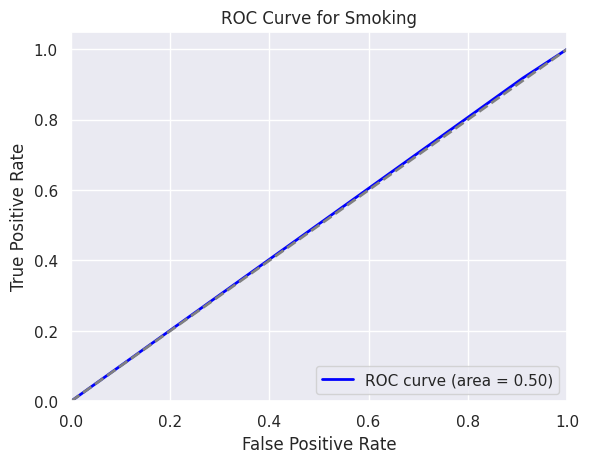

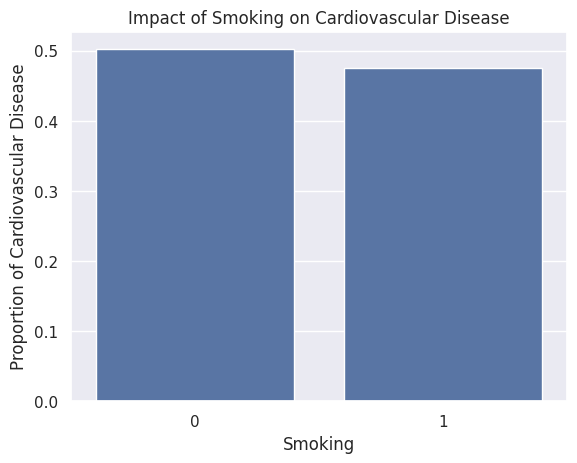

In [23]:


# Assuming cardio_data is your DataFrame containing all relevant data
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

X = cardio_data[features]
y = cardio_data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model for smoking
log_reg_smoke = LogisticRegression(max_iter=1000)

# Fitting the model on smoking data
log_reg_smoke.fit(X_train[['smoke']], y_train)

# Predicting on the test set for smoking
y_pred_smoke = log_reg_smoke.predict(X_test[['smoke']])
y_pred_proba_smoke = log_reg_smoke.predict_proba(X_test[['smoke']])[:, 1]

# Printing classification report and metrics for smoking
print("Smoking and Cardiovascular Disease")
print(classification_report(y_test, y_pred_smoke))
print(f'Accuracy: {accuracy_score(y_test, y_pred_smoke)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba_smoke)}')

# Calculating ROC curve for smoking
fpr_smoke, tpr_smoke, _ = roc_curve(y_test, y_pred_proba_smoke)

# Plotting ROC curve for smoking
plt.figure()
plt.plot(fpr_smoke, tpr_smoke, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba_smoke))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Smoking')
plt.legend(loc="lower right")
plt.show()

# Plotting barplot to visualize impact of smoking on cardiovascular disease
sns.barplot(x='smoke', y='cardio', data=cardio_data, errorbar=None)
plt.title('Impact of Smoking on Cardiovascular Disease')
plt.xlabel('Smoking')
plt.ylabel('Proportion of Cardiovascular Disease')
plt.show()


### Alcohol

In [24]:
 
df2.groupby('alco').agg({'cardio': ['mean','sum', 'count'], 'gender': 'mean', 'age':'mean', 'BMI': 'mean', 'bp_gap': 'mean', 'gluc': 'mean','active': 'mean', 'smoke': 'mean', 'cholesterol': 'mean'})

cardio                  gender        age        BMI     bp_gap  \
          mean    sum  count      mean       mean       mean       mean   
alco                                                                      
0     0.499664  30518  61077  1.332678  52.914141  27.527278  44.793114   
1     0.475606   1628   3423  1.694712  52.013146  27.856404  45.567046   

          gluc    active     smoke cholesterol  
          mean      mean      mean        mean  
alco                                            
0     1.224520  0.801153  0.064803    1.359088  
1     1.245983  0.844873  0.494888    1.456617

Alcohol Consumption and Cardiovascular Disease
              precision    recall  f1-score   support

           0       0.49      0.05      0.09     10461
           1       0.50      0.95      0.66     10539

    accuracy                           0.50     21000
   macro avg       0.49      0.50      0.37     21000
weighted avg       0.49      0.50      0.37     21000

Accuracy: 0.5005238095238095
ROC AUC: 0.4988534263588344


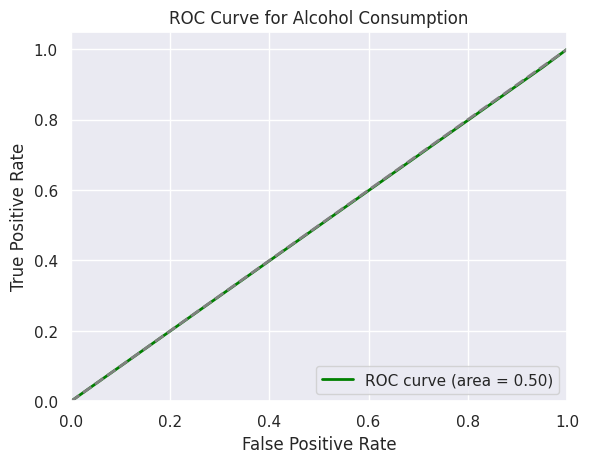

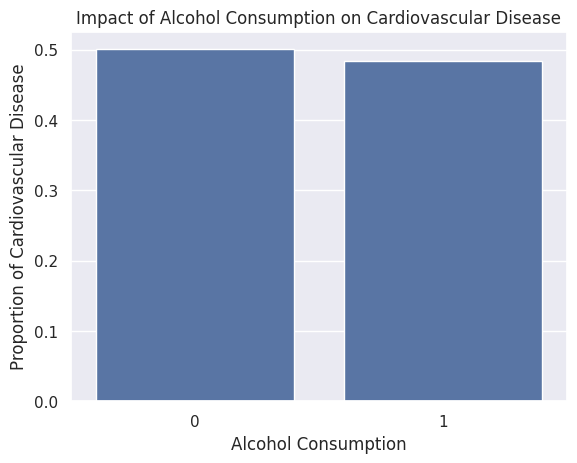

In [25]:

features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

X = cardio_data[features]
y = cardio_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg_alco = LogisticRegression(max_iter=1000)

log_reg_alco.fit(X_train[['alco']], y_train)
y_pred_alco = log_reg_alco.predict(X_test[['alco']])
y_pred_proba_alco = log_reg_alco.predict_proba(X_test[['alco']])[:, 1]

print("Alcohol Consumption and Cardiovascular Disease")
print(classification_report(y_test, y_pred_alco))
print(f'Accuracy: {accuracy_score(y_test, y_pred_alco)}')
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba_alco)}')

fpr_alco, tpr_alco, _ = roc_curve(y_test, y_pred_proba_alco)
plt.figure()
plt.plot(fpr_alco, tpr_alco, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba_alco))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Alcohol Consumption')
plt.legend(loc="lower right")
plt.show()

sns.barplot(x='alco', y='cardio', data=cardio_data, errorbar=None)
plt.title('Impact of Alcohol Consumption on Cardiovascular Disease')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Proportion of Cardiovascular Disease')
plt.show()

Cholesterol Results:
Cholesterol level 1:
  Active: Total = 38883, Suffers = 16647, Proportion = 0.43
  Not Active: Total = 9578, Suffers = 4669, Proportion = 0.49

Cholesterol level 2:
  Active: Total = 6845, Suffers = 4028, Proportion = 0.59
  Not Active: Total = 1738, Suffers = 1114, Proportion = 0.64

Cholesterol level 3:
  Active: Total = 6096, Suffers = 4675, Proportion = 0.77
  Not Active: Total = 1360, Suffers = 1013, Proportion = 0.74



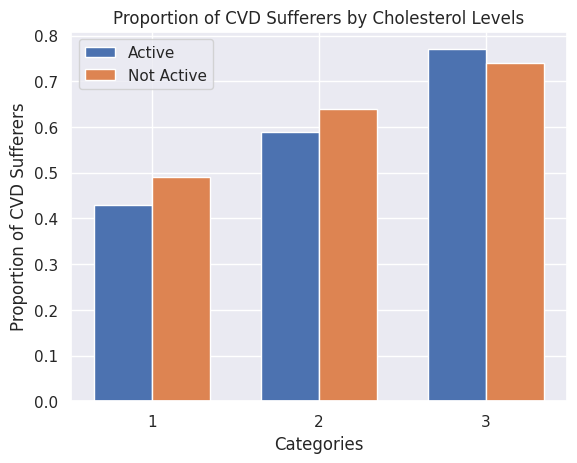

Glucose Results:
Glucose level 1:
  Active: Total = 44193, Suffers = 20790, Proportion = 0.47
  Not Active: Total = 10693, Suffers = 5565, Proportion = 0.52

Glucose level 2:
  Active: Total = 3675, Suffers = 2128, Proportion = 0.58
  Not Active: Total = 998, Suffers = 611, Proportion = 0.61

Glucose level 3:
  Active: Total = 3956, Suffers = 2432, Proportion = 0.61
  Not Active: Total = 985, Suffers = 620, Proportion = 0.63



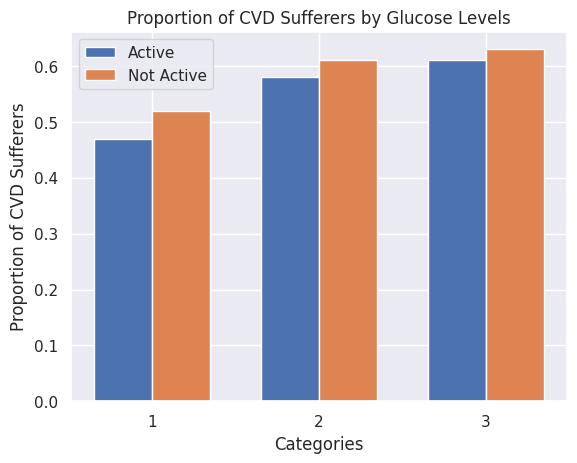

Smoking Results:
Smoking level 0:
  Active: Total = 47106, Suffers = 23222, Proportion = 0.49
  Not Active: Total = 11742, Suffers = 6282, Proportion = 0.54

Smoking level 1:
  Active: Total = 4718, Suffers = 2128, Proportion = 0.45
  Not Active: Total = 934, Suffers = 514, Proportion = 0.55



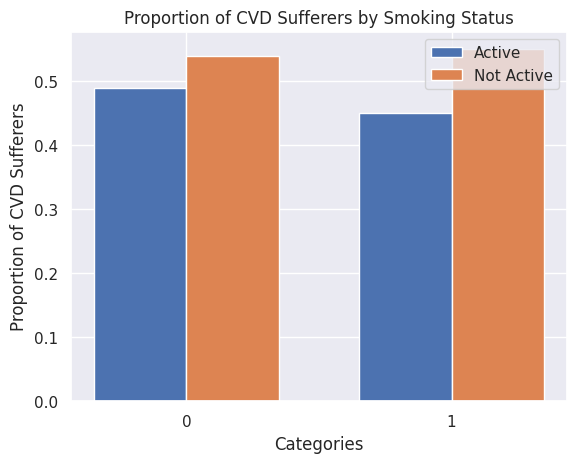

Alcohol Consumption Results:
Alcohol consumption 0:
  Active: Total = 48932, Suffers = 24003, Proportion = 0.49
  Not Active: Total = 12145, Suffers = 6515, Proportion = 0.54

Alcohol consumption 1:
  Active: Total = 2892, Suffers = 1347, Proportion = 0.47
  Not Active: Total = 531, Suffers = 281, Proportion = 0.53



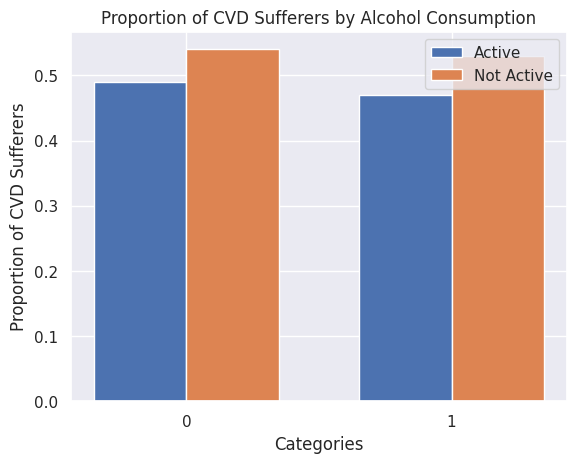

In [26]:

def calculate_proportion(suffers, total):
    return round((suffers / total), 2)

def compare_metric(df, metric):
    categories = sorted(df[metric].unique()) 
    results = {}

    for category in categories:
        cat_df = df[df[metric] == category]
        active = cat_df[cat_df['active'] == 1]
        not_active = cat_df[cat_df['active'] == 0]

        active_suffers = active[active['cardio'] == 1].count().iloc[0]
        not_active_suffers = not_active[not_active['cardio'] == 1].count().iloc[0]

        active_proportion = calculate_proportion(active_suffers, active.count().iloc[0])
        not_active_proportion = calculate_proportion(not_active_suffers, not_active.count().iloc[0])

        results[category] = {
            'active': {
                'total': active.count().iloc[0],
                'suffers': active_suffers,
                'proportion': active_proportion
            },
            'not_active': {
                'total': not_active.count().iloc[0],
                'suffers': not_active_suffers,
                'proportion': not_active_proportion
            }
        }

    return results

# Calculate results for different metrics
cholesterol_results = compare_metric(df, 'cholesterol')
glucose_results = compare_metric(df, 'gluc')
smoking_results = compare_metric(df, 'smoke')
alcohol_results = compare_metric(df, 'alco')


# Function to plot results
def plot_results(results, title):
    categories = sorted(list(results.keys()))  # Sort the categories before plotting
    active_proportions = [results[cat]['active']['proportion'] for cat in categories]
    not_active_proportions = [results[cat]['not_active']['proportion'] for cat in categories]

    x = range(len(categories))
    
    fig, ax = plt.subplots()
    
    bar_width = 0.35
    bar1 = ax.bar(x, active_proportions, bar_width, label='Active')
    bar2 = ax.bar([p + bar_width for p in x], not_active_proportions, bar_width, label='Not Active')

    ax.set_xlabel('Categories')
    ax.set_ylabel('Proportion of CVD Sufferers')
    ax.set_title(title)
    ax.set_xticks([p + bar_width / 2 for p in x])
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

# Print and plot results for cholesterol
print("Cholesterol Results:")
for category, stats in cholesterol_results.items():
    print(f"Cholesterol level {category}:")
    print(f"  Active: Total = {stats['active']['total']}, Suffers = {stats['active']['suffers']}, Proportion = {stats['active']['proportion']}")
    print(f"  Not Active: Total = {stats['not_active']['total']}, Suffers = {stats['not_active']['suffers']}, Proportion = {stats['not_active']['proportion']}\n")
plot_results(cholesterol_results, 'Proportion of CVD Sufferers by Cholesterol Levels')

# Print and plot results for glucose
print("Glucose Results:")
for category, stats in glucose_results.items():
    print(f"Glucose level {category}:")
    print(f"  Active: Total = {stats['active']['total']}, Suffers = {stats['active']['suffers']}, Proportion = {stats['active']['proportion']}")
    print(f"  Not Active: Total = {stats['not_active']['total']}, Suffers = {stats['not_active']['suffers']}, Proportion = {stats['not_active']['proportion']}\n")
plot_results(glucose_results, 'Proportion of CVD Sufferers by Glucose Levels')

# Print and plot results for smoking
print("Smoking Results:")
for category, stats in smoking_results.items():
    print(f"Smoking level {category}:")
    print(f"  Active: Total = {stats['active']['total']}, Suffers = {stats['active']['suffers']}, Proportion = {stats['active']['proportion']}")
    print(f"  Not Active: Total = {stats['not_active']['total']}, Suffers = {stats['not_active']['suffers']}, Proportion = {stats['not_active']['proportion']}\n")
plot_results(smoking_results, 'Proportion of CVD Sufferers by Smoking Status')


# Print and plot results for alcohol consumption
print("Alcohol Consumption Results:")
for category, stats in alcohol_results.items():
    print(f"Alcohol consumption {category}:")
    print(f"  Active: Total = {stats['active']['total']}, Suffers = {stats['active']['suffers']}, Proportion = {stats['active']['proportion']}")
    print(f"  Not Active: Total = {stats['not_active']['total']}, Suffers = {stats['not_active']['suffers']}, Proportion = {stats['not_active']['proportion']}\n")
plot_results(alcohol_results, 'Proportion of CVD Sufferers by Alcohol Consumption')


# MODELING

## KNN

In [27]:
# count the number of people with and without cardiovascular disease
cardio_num = df['cardio'].value_counts()

print("Number of people with cardiovascular disease (1):", cardio_num[1])
print("Number of people without cardiovascular disease (0):", cardio_num[0])

# The number of people with or without cardiovascular disease is close, so we have balanced dataset

Number of people with cardiovascular disease (1): 32146
Number of people without cardiovascular disease (0): 32354


Test Set Evaluation:

Accuracy: 0.6983720930232559


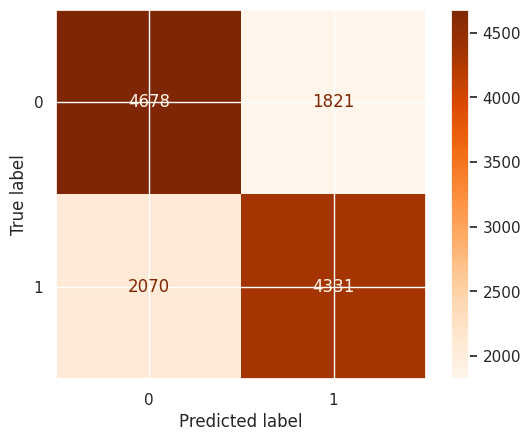

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      6499
           1       0.70      0.68      0.69      6401

    accuracy                           0.70     12900
   macro avg       0.70      0.70      0.70     12900
weighted avg       0.70      0.70      0.70     12900



In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

df_knn = df.copy()
X = df_knn.drop(['id', 'cardio'], axis=1)
y = df_knn['cardio']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical cols
scaler = StandardScaler()
cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
X_train = scaler.fit_transform(X_train[cols])
X_test = scaler.transform(X_test[cols])

# KNN classifier
knn = KNeighborsClassifier(metric='euclidean', weights='uniform', n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test Set Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Oranges')
plt.show()

print(classification_report(y_test, y_pred))

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Cross-validation
# Train model with cv of 5 
knn_cv = KNeighborsClassifier(n_neighbors=9)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

print('cv:', cv_scores)

# Create new a knn model
knn2 = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(3, 27, 2)}

knn_gs = GridSearchCV(knn2, param_grid, cv=5)
knn_gs.fit(X, y)

print('Best k value:', knn_gs.best_params_)
print('Best score:', knn_gs.best_score_)

cv: [0.70651163 0.71       0.70116279 0.7024031  0.69945736]
Best k value: {'n_neighbors': 23}
Best score: 0.7149147286821705


## Logistic Regression

Accuracy: 0.7215503875968993


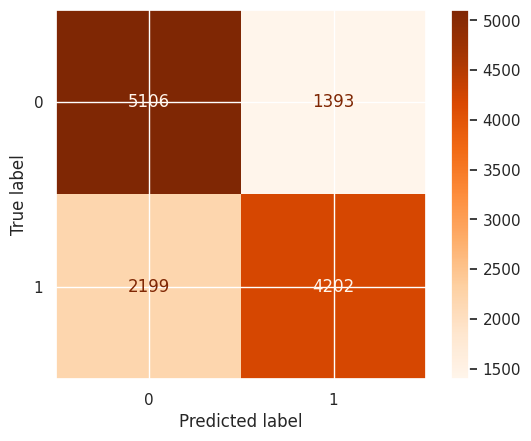

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6499
           1       0.75      0.66      0.70      6401

    accuracy                           0.72     12900
   macro avg       0.73      0.72      0.72     12900
weighted avg       0.72      0.72      0.72     12900



In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty="l2", C=100, solver='liblinear', random_state=42)
model = lr.fit(X_train,y_train)
y_prob_lr = lr.predict_proba(X_test)

print("Accuracy:", lr.score(X_test, y_test))

y_pred_lr = lr.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Oranges')
plt.show()

print(classification_report(y_test, y_pred_lr))

       Feature  Importance
1       height    0.039304
6         gluc    0.079223
4        ap_lo    0.120250
2       weight    0.148306
5  cholesterol    0.334074
0          age    0.351550
3        ap_hi    0.875541


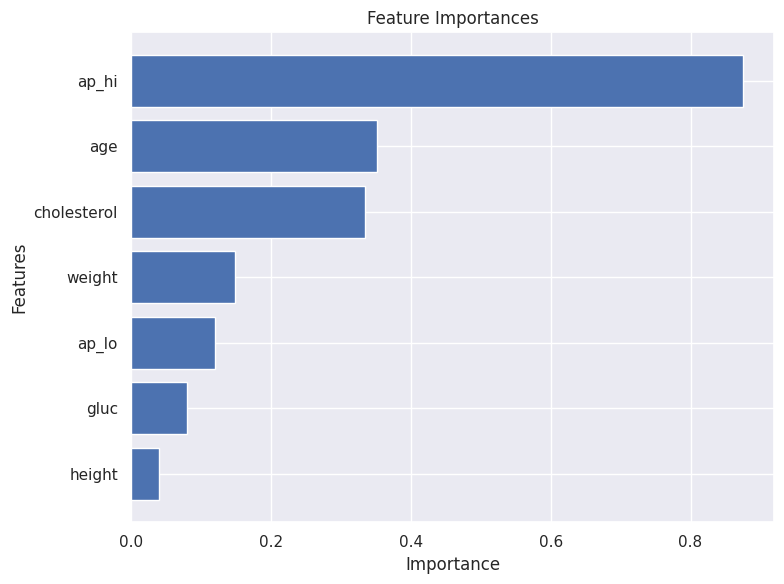

In [31]:
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']

coef = lr.coef_[0]  
imp = abs(coef)  

# df with feature names and importances
feature_imp = pd.DataFrame({'Feature': columns, 'Importance': imp})
feature_imp = feature_imp.sort_values(by='Importance', ascending=True)

print(feature_imp)

plt.figure(figsize=(8, 6))
plt.barh(feature_imp['Feature'], feature_imp['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


## Random Forest

Accuracy:  0.6932558139534883


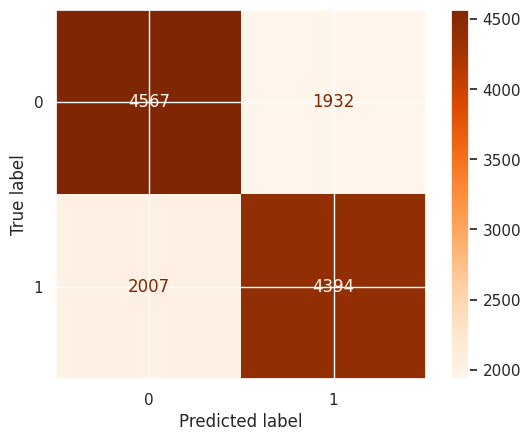

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6499
           1       0.69      0.69      0.69      6401

    accuracy                           0.69     12900
   macro avg       0.69      0.69      0.69     12900
weighted avg       0.69      0.69      0.69     12900



In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Accuracy: ', rf.score(X_test,y_test))

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Oranges')
plt.show()

print(classification_report(y_test, y_pred_rf))


## Decision Tree Classifier

[0.77664565 0.76501365 0.76636264 0.77432905 0.7669986  0.77517858
 0.78388007]
0.7726297500549567
{'max_depth': 7}
[0.79109386 0.78000968 0.78125827 0.78746102 0.78083711 0.78862565
 0.7991264 ]
0.7869159982271686


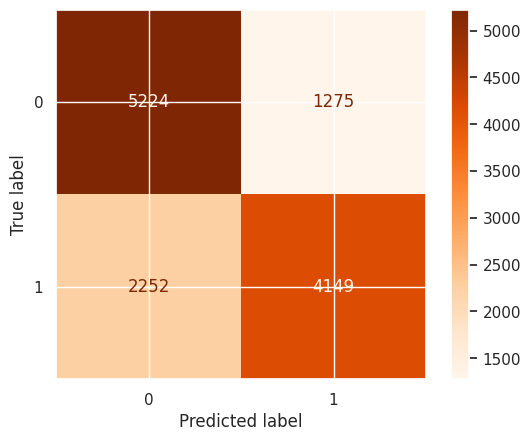

Accuracy: 0.7265891472868217
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6499
           1       0.76      0.65      0.70      6401

    accuracy                           0.73     12900
   macro avg       0.73      0.73      0.72     12900
weighted avg       0.73      0.73      0.72     12900



In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(max_depth=3,random_state=42)
auc_dt = cross_val_score(dt,X_train,y_train,scoring = 'roc_auc',cv=7)

print(auc_dt)
print(auc_dt.mean())

# Finding Best Parameters
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}
grid_search = GridSearchCV(dt, parameters, scoring='roc_auc', cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print(best_params)

# Update
dt2 = DecisionTreeClassifier(max_depth=6,random_state=42)

auc_dt2 = cross_val_score(dt2,X_train,y_train,scoring = 'roc_auc',cv=7)

print(auc_dt2)
print(auc_dt2.mean())


dt2.fit(X_train, y_train)
y_pred_dt2 = dt2.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt2, cmap='Oranges')
plt.show()


print("Accuracy:", accuracy_score(y_test, y_pred_dt2))
print(classification_report(y_test, y_pred_dt2))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74d26b6c-d1e9-47f9-af90-ee5bdd51ba9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>